### Learn Pandas in 10 minutes

[https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

### Import pandas, numpy and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset from this [address]('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

### Show the first 10 entries

In [3]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### What is the number of observations in the dataset?

In [5]:
len(df)

4622

### What is the number of columns in the dataset?

In [6]:
df.shape

(4622, 5)

### Which was the most-ordered item and how many times it was ordered?

In [7]:
vals=df.groupby('item_name').count().sort_values('quantity', ascending=False)
vals.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,726,726,726,726
Chicken Burrito,553,553,553,553
Chips and Guacamole,479,479,0,479
Steak Burrito,368,368,368,368
Canned Soft Drink,301,301,301,301


### How many different items are sold?

In [8]:
len(vals)

50

### How many items were orderd in total?

In [9]:
df['quantity'].sum()

4972

### Turn the item price into a float

In [10]:
df['item_price_float']=df['item_price'].apply(lambda x: float(x[1:]))
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


### What is the price of each item?

In [151]:
df.groupby('item_name')['item_price_float'].mean()

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

### How much was the revenue for the period in the dataset?

In [11]:
(df['quantity']*df['item_price_float']).sum()

39237.02

### How many orders were made in the period?

In [12]:
df['order_id'].value_counts().shape

(1834,)

### What is the average revenue amount per order?

In [13]:
((df['quantity']*df['item_price_float']).sum())/(df['order_id'].value_counts().shape)

array([21.39423119])

### Merge the table ```dfa``` that contains order date and order id with ```df``` and plot daily revenue 

In [14]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})

df['price']= (df['item_price_float'])*(df['quantity'])
dfa.merge(df).groupby("date").sum()["price"]

date
2017-01-01    1032.45
2017-01-02    1167.54
2017-01-03    1225.32
2017-01-04    1246.74
2017-01-05    1432.00
2017-01-06    1914.03
2017-01-07    1004.23
2017-01-08    1191.80
2017-01-09    1100.46
2017-01-10    1210.60
2017-01-11    1183.40
2017-01-12    1056.13
2017-01-13    1285.54
2017-01-14    1306.62
2017-01-15    1068.92
2017-01-16    1403.50
2017-01-17    1036.90
2017-01-18    1208.23
2017-01-19     999.30
2017-01-20    1036.72
2017-01-21    1648.57
2017-01-22    1624.25
2017-01-23     847.79
2017-01-24    1223.30
2017-01-25    1351.54
2017-01-26    1242.48
2017-01-27    1054.75
2017-01-28     994.63
2017-01-29    1094.32
2017-01-30    1018.20
2017-01-31    1048.04
2017-02-01    1268.66
Name: price, dtype: float64

Create a histogram of the top 5 items bought

Text(0, 0.5, 'Quantity')

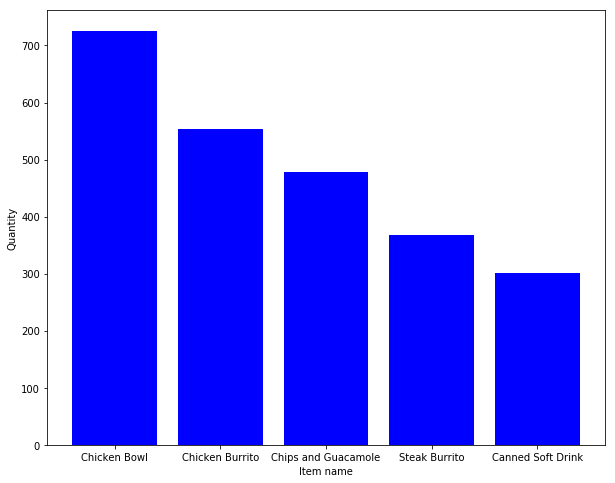

In [17]:
df1 = df['item_name'].value_counts()[:5]
plt.figure(1, figsize=(10,8))
plt.bar (df1.index, df1.values,  color = 'blue')
plt.xlabel("Item name")
plt.ylabel("Quantity")

### Sort the dataset by the name of the item

In [148]:
df.groupby('item_name').count().sort_values('item_name').head()

,order_id,quantity,choice_description,item_price,item_price_float,date,price
item_name,,,,,,,
6 Pack Soft Drink,54,54,54,54,54,19,54
Barbacoa Bowl,66,66,66,66,66,34,66
Barbacoa Burrito,91,91,91,91,91,44,91
Barbacoa Crispy Tacos,11,11,11,11,11,7,11
Barbacoa Salad Bowl,10,10,10,10,10,4,10


### How many times were a Veggie Salad Bowl ordered?

In [58]:
vals['quantity']['Veggie Salad Bowl']

18

### How many times people orderd more than one Canned Soda? 

In [104]:
len(df[df['item_name'] == 'Canned Soda'].quantity[df['quantity'] > 1])

20

### Create a scatterplot with the number of items orderered per order price

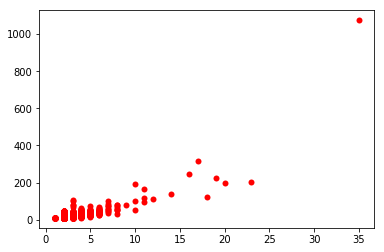

In [146]:
plt.scatter(df.groupby("order_id").sum()["quantity"], df.groupby("order_id").sum()["price"], color="red", linewidths=0.001)

Submit solution to [https://goo.gl/forms/0iOA8xFJ2o5qONBr2](https://goo.gl/forms/0iOA8xFJ2o5qONBr2)